# Início

Importar bibliotecas

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, roc_curve

Warnings

In [3]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Set the zero_division parameter to 1
warnings.filterwarnings('ignore', category=UndefinedMetricWarning, module='sklearn')
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')

Ler CSV do GitHub

In [4]:
url = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/df_classification.csv'
df = pd.read_csv(url)

In [5]:
df_binary = df.copy()
df_binary = df_binary.drop(['Unnamed: 0','DataDiagnostico','DataFinal','Evolucao', 'NumDias'], axis = 1)
df_binary = df_binary.replace(['Cured','M','No'],0)
df_binary = df_binary.replace(['Died','F','Yes'],1)

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and 'target' is your target variable
X = df_binary.drop('FicouInternado', axis=1)
y = df_binary['FicouInternado']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models for feature selection
models = {
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'GradientBoost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(n_jobs=-1)
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)

# Perform feature selection
important_features = set()
for name, model in models.items():
    model.fit(X_train, y_train)
    result = permutation_importance(model, X_val, y_val, scoring=make_scorer(g_mean), n_repeats=10, n_jobs=-1)
    feature_importances = result.importances_mean
    top_features = np.argsort(feature_importances)[-10:]
    important_features.update(top_features)
    print(f'Model: {name}')
    print('Top 10 features:')
    for feature in top_features:
        print(f'Feature: {X_train.columns[feature]}, Importance: {feature_importances[feature]}')


# Print the important features
print("Important features:")
for feature in important_features:
    print(X_train.columns[feature])


# Filter the training data
X_train_filtered = X_train.iloc[:, list(important_features)]
X_val_filtered = X_val.iloc[:, list(important_features)]

Model: RandomForest
Top 10 features:
Feature: ComorbidadeRenal, Importance: 0.007801350211064045
Feature: Febre, Importance: 0.008247080371520065
Feature: ComorbidadeObesidade, Importance: 0.01015690722494506
Feature: ComorbidadeCardio, Importance: 0.023568182370652845
Feature: ComorbidadeDiabetes, Importance: 0.03416460176528861
Feature: Coriza, Importance: 0.0343407555443304
Feature: DorGarganta, Importance: 0.0433387628168462
Feature: Cefaleia, Importance: 0.04485010981917731
Feature: Idade, Importance: 0.12306808070511777
Feature: DificuldadeRespiratoria, Importance: 0.14370997959429294
Model: GradientBoost
Top 10 features:
Feature: ComorbidadeRenal, Importance: 0.007054303843713311
Feature: Diarreia, Importance: 0.007644979330381435
Feature: ComorbidadeObesidade, Importance: 0.007961907229977522
Feature: ComorbidadeCardio, Importance: 0.02030641600191351
Feature: ComorbidadeDiabetes, Importance: 0.033516974127139734
Feature: Coriza, Importance: 0.05545659098416097
Feature: DorGarg

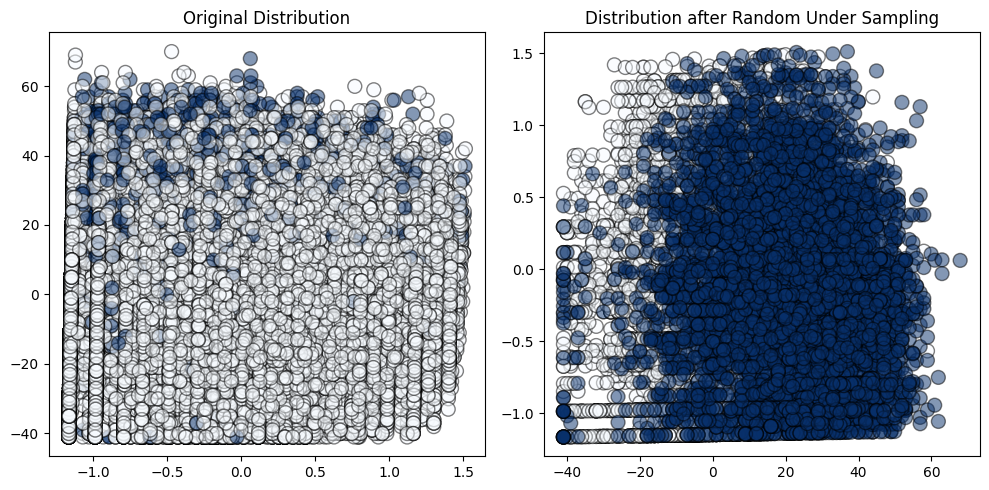

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have your data in pandas DataFrame format
X = X_train_filtered
y = y_train

# Apply the random under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X, y)

# Apply PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.transform(X_res)

# Visualize the original dataset
plt.figure(figsize=(10, 5))  # Increase the size of the plot

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 1], X_pca[:, 0], c=y, alpha=0.5, edgecolor='k', cmap='Blues', s=100)  # Increase the size of the points
plt.title('Original Distribution')

# Visualize the new dataset
plt.subplot(1, 2, 2)
plt.scatter(X_res_pca[:, 0], X_res_pca[:, 1], c=y_res, alpha=0.5, edgecolor='k', cmap='Blues', s=100)  # Increase the size of the points
plt.title('Distribution after Random Under Sampling')

plt.tight_layout()
plt.show()


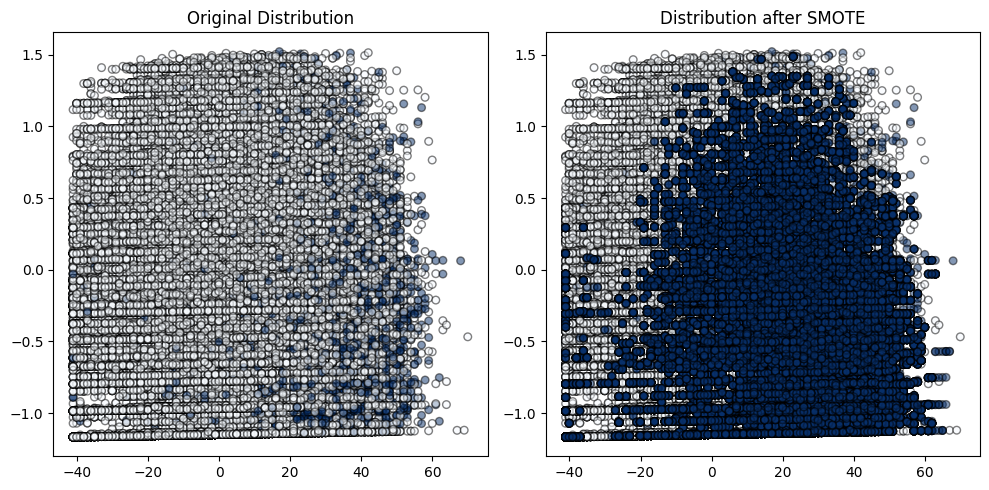

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Assuming you have your data in pandas DataFrame format
X = X_train_filtered
y = y_train

# Apply SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Apply PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.transform(X_res)

# Visualize the original dataset
plt.figure(figsize=(10, 5))  # Increase the size of the plot

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5, edgecolor='k', cmap='Blues', s=30)  # Increase the size of the points
plt.title('Original Distribution')

# Visualize the new dataset
plt.subplot(1, 2, 2)
plt.scatter(X_res_pca[:, 0], X_res_pca[:, 1], c=y_res, alpha=0.5, edgecolor='k', cmap='Blues', s=30)  # Increase the size of the points
plt.title('Distribution after SMOTE')

plt.tight_layout()
plt.show()


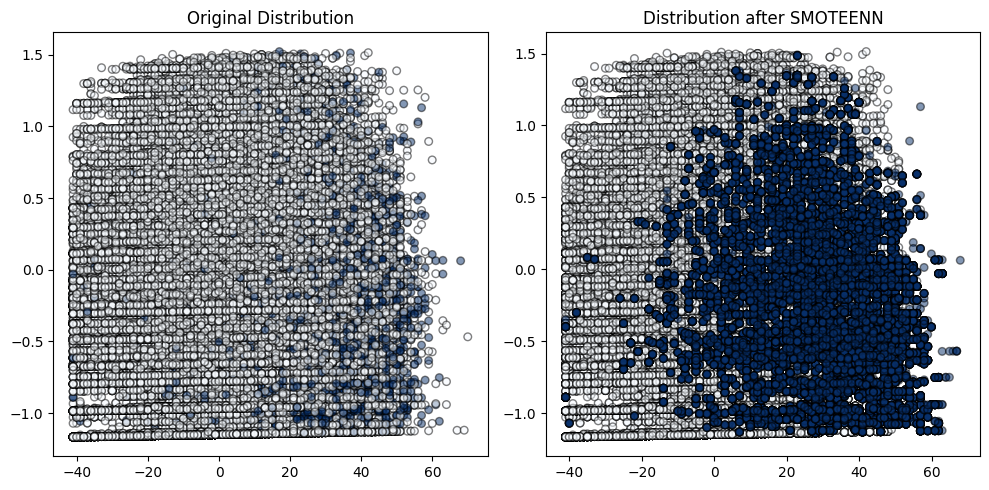

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN

# Assuming you have your data in pandas DataFrame format
X = X_train_filtered
y = y_train

# Apply SMOTEENN
smoteenn = SMOTEENN()
X_res, y_res = smoteenn.fit_resample(X, y)

# Apply PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.transform(X_res)

# Visualize the original dataset
plt.figure(figsize=(10, 5))  # Increase the size of the plot

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5, edgecolor='k', cmap='Blues', s=30)  # Increase the size of the points
plt.title('Original Distribution')

# Visualize the new dataset
plt.subplot(1, 2, 2)
plt.scatter(X_res_pca[:, 0], X_res_pca[:, 1], c=y_res, alpha=0.5, edgecolor='k', cmap='Blues', s=30)  # Increase the size of the points
plt.title('Distribution after SMOTEENN')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and 'target' is your target variable
X = df_binary.drop('FicouInternado', axis=1)
y = df_binary['FicouInternado']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models for feature selection
models = {
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'GradientBoost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(n_jobs=-1)
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)

# Perform feature selection
important_features = set()
for name, model in models.items():
    model.fit(X_train, y_train)
    result = permutation_importance(model, X_val, y_val, scoring=make_scorer(g_mean), n_repeats=10, n_jobs=-1)
    feature_importances = result.importances_mean
    top_features = np.argsort(feature_importances)[-10:]
    important_features.update(top_features)
    print(f'Model: {name}')
    print('Top 10 features:')
    for feature in top_features:
        print(f'Feature: {X_train.columns[feature]}, Importance: {feature_importances[feature]}')


# Print the important features
print("Important features:")
for feature in important_features:
    print(X_train.columns[feature])


# Filter the training data
X_train_filtered = X_train.iloc[:, list(important_features)]
X_val_filtered = X_val.iloc[:, list(important_features)]

# Define the models for grid search
models = {
    'LogisticRegression': LogisticRegression(n_jobs=-1),
    'GradientBoost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(n_jobs=-1),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(n_jobs=-1),
    #'SVM': SVC(),
    #'LightGBM': LGBMClassifier(n_jobs=-1)
}

# Define the samplers
samplers = {
    'original': lambda x, y: (x, y),
    'undersample': RandomUnderSampler().fit_resample,
    'smote': SMOTE().fit_resample,
    'smoteenn': SMOTEENN().fit_resample
}

# Define the grid search parameters
param_grids = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'GradientBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]},
    'DecisionTree': {'max_depth': [None, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01]},
    'Bagging': {'n_estimators': [10, 20]},
    #'SVM': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    #'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [None, 5, 10]}
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)

g_mean_scorer = make_scorer(g_mean)

# Perform grid search
for name, model in models.items():
    for sampler_name, sampler in samplers.items():
        X_resampled, y_resampled = sampler(X_train_filtered, y_train)
        grid_search = GridSearchCV(model, param_grids[name], scoring=g_mean_scorer, n_jobs=-1)
        grid_search.fit(X_resampled, y_resampled)
        print(f'Model: {name}, Sampler: {sampler_name}, Best Params: {grid_search.best_params_}, Best Score: {grid_search.best_score_}')

Model: RandomForest
Top 10 features:
Feature: Diarreia, Importance: 0.0032784429784886494
Feature: ProfissionalSaude, Importance: 0.004626767988083413
Feature: ComorbidadeObesidade, Importance: 0.0070666416172557815
Feature: ComorbidadeCardio, Importance: 0.019710833655065763
Feature: ComorbidadeDiabetes, Importance: 0.028574763518950202
Feature: Coriza, Importance: 0.03291717689809501
Feature: DorGarganta, Importance: 0.042810468028781266
Feature: Cefaleia, Importance: 0.04799042588914985
Feature: Idade, Importance: 0.11883183691370806
Feature: DificuldadeRespiratoria, Importance: 0.13688157019229386
Model: GradientBoost
Top 10 features:
Feature: Sexo, Importance: 0.006883292702403532
Feature: ProfissionalSaude, Importance: 0.007408429057109933
Feature: Diarreia, Importance: 0.008186129809440395
Feature: ComorbidadeCardio, Importance: 0.018224489946754997
Feature: ComorbidadeDiabetes, Importance: 0.03280840849129934
Feature: Coriza, Importance: 0.05369393976275923
Feature: DorGarganta

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model: RandomForest, Sampler: smote, Best Params: {'max_depth': None, 'n_estimators': 200}, Best Score: 0.9056452817367286


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model: RandomForest, Sampler: smoteenn, Best Params: {'max_depth': None, 'n_estimators': 200}, Best Score: 0.996126609026388
Model: DecisionTree, Sampler: original, Best Params: {'max_depth': None}, Best Score: 0.46252438708462745
Model: DecisionTree, Sampler: undersample, Best Params: {'max_depth': 5}, Best Score: 0.8021846642047221
Model: DecisionTree, Sampler: smote, Best Params: {'max_depth': None}, Best Score: 0.9035087722274808


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model: DecisionTree, Sampler: smoteenn, Best Params: {'max_depth': None}, Best Score: 0.9949261511958666
Model: KNN, Sampler: original, Best Params: {'n_neighbors': 3}, Best Score: 0.4462699851796469
Model: KNN, Sampler: undersample, Best Params: {'n_neighbors': 7}, Best Score: 0.7902453627629992
Model: KNN, Sampler: smote, Best Params: {'n_neighbors': 7}, Best Score: 0.800117319198454
Model: KNN, Sampler: smoteenn, Best Params: {'n_neighbors': 3}, Best Score: 0.9974669410051101
Model: AdaBoost, Sampler: original, Best Params: {'learning_rate': 0.1, 'n_estimators': 100}, Best Score: 0.2954116299626185
Model: AdaBoost, Sampler: undersample, Best Params: {'learning_rate': 0.1, 'n_estimators': 100}, Best Score: 0.8257825429336385
Model: AdaBoost, Sampler: smote, Best Params: {'learning_rate': 0.1, 'n_estimators': 100}, Best Score: 0.8291973030780898
Model: AdaBoost, Sampler: smoteenn, Best Params: {'learning_rate': 0.1, 'n_estimators': 100}, Best Score: 0.9083935227455084
Model: Bagging, 

## Original

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
import numpy as np

# Define classifiers with their hyperparameters
classifiers = {
    "AdaBoost": AdaBoostClassifier(learning_rate=0.1, n_estimators=100),
    "Bagging": BaggingClassifier(n_estimators=20),
    "DT": DecisionTreeClassifier(max_depth=None),
    "GB": GradientBoostingClassifier(learning_rate=0.1, n_estimators=100),
    "K-NN": KNeighborsClassifier(n_neighbors=3),
    "LR": LogisticRegression(C=1),
    "RF": RandomForestClassifier(max_depth=None, n_estimators=200),
    "XGB": XGBClassifier(learning_rate=0.1, n_estimators=100)
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)

# Fit each classifier and print the metrics
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    y_prob = clf.predict_proba(X_val)[:, 1]

    # Calculate metrics
    gmean = g_mean(y_val,y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"Classifier: {name}")
    print(f"G-Mean: {gmean}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}\n")


Classifier: AdaBoost
G-Mean: 0.2974832729681331
F1-Score: 0.155668358714044
ROC-AUC: 0.9084250577538528

Classifier: Bagging
G-Mean: 0.46466095182980116
F1-Score: 0.280082135523614
ROC-AUC: 0.8139012903373102

Classifier: DT
G-Mean: 0.46167548005493864
F1-Score: 0.26232052774544046
ROC-AUC: 0.6667462564695871

Classifier: GB
G-Mean: 0.47644399744708893
F1-Score: 0.32407828857533
ROC-AUC: 0.9132377934087628

Classifier: K-NN
G-Mean: 0.442765866413767
F1-Score: 0.26512226512226517
ROC-AUC: 0.7146994838184247

Classifier: LR
G-Mean: 0.44989499875472355
F1-Score: 0.3006164058795638
ROC-AUC: 0.9086703123885628

Classifier: RF
G-Mean: 0.45673657792240935
F1-Score: 0.2774030354131535
ROC-AUC: 0.8437511861601958

Classifier: XGB
G-Mean: 0.44421869196950525
F1-Score: 0.2949880668257756
ROC-AUC: 0.9129363187567366



## RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under Sampling (RUS)
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Define classifiers with their hyperparameters
classifiers = {
    "AdaBoost": AdaBoostClassifier(learning_rate=0.1, n_estimators=100),
    "Bagging": BaggingClassifier(n_estimators=20),
    "DT": DecisionTreeClassifier(max_depth=5),
    "GB": GradientBoostingClassifier(learning_rate=0.1, n_estimators=100),
    "K-NN": KNeighborsClassifier(n_neighbors=7),
    "LR": LogisticRegression(C=0.1),
    "RF": RandomForestClassifier(max_depth=10, n_estimators=200),
    "XGB": XGBClassifier(learning_rate=0.1, n_estimators=100)
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)

# Fit each classifier and print the metrics
for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_val)
    y_prob = clf.predict_proba(X_val)[:, 1]

    # Calculate metrics
    gmean = g_mean(y_val,y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"Classifier: {name}")
    print(f"G-Mean: {gmean}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}\n")


Classifier: AdaBoost
G-Mean: 0.83492451855455
F1-Score: 0.29514916875427005
ROC-AUC: 0.9079653753963322

Classifier: Bagging
G-Mean: 0.7986242301022255
F1-Score: 0.2461813132315017
ROC-AUC: 0.8756416132669275

Classifier: DT
G-Mean: 0.8191286381014
F1-Score: 0.2853223593964335
ROC-AUC: 0.8957474571022624

Classifier: GB
G-Mean: 0.8377222050379817
F1-Score: 0.2966583314389634
ROC-AUC: 0.9132351869487424

Classifier: K-NN
G-Mean: 0.8113048340236012
F1-Score: 0.2661418997978938
ROC-AUC: 0.8784374436518686

Classifier: LR
G-Mean: 0.8354494494014838
F1-Score: 0.29826989619377164
ROC-AUC: 0.9091342622721503

Classifier: RF
G-Mean: 0.83818504837279
F1-Score: 0.29839816933638447
ROC-AUC: 0.912103241121549

Classifier: XGB
G-Mean: 0.8369424820092504
F1-Score: 0.29593459005223705
ROC-AUC: 0.9102129656312711



##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Define classifiers with their hyperparameters
classifiers = {
    "AdaBoost": AdaBoostClassifier(learning_rate=0.1, n_estimators=100),
    "Bagging": BaggingClassifier(n_estimators=20),
    "DT": DecisionTreeClassifier(max_depth=None),
    "GB": GradientBoostingClassifier(learning_rate=0.1, n_estimators=200),
    "K-NN": KNeighborsClassifier(n_neighbors=7),
    "LR": LogisticRegression(C=10),
    "RF": RandomForestClassifier(max_depth=None, n_estimators=100),
    "XGB": XGBClassifier(learning_rate=0.1, n_estimators=200)
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)


# Fit each classifier and print the metrics
for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_val)
    y_prob = clf.predict_proba(X_val)[:, 1]

    # Calculate metrics
    gmean = g_mean(y_val,y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"Classifier: {name}")
    print(f"G-Mean: {gmean}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}\n")


Classifier: AdaBoost
G-Mean: 0.8216212201514597
F1-Score: 0.28480941070014704
ROC-AUC: 0.8961025541470422

Classifier: Bagging
G-Mean: 0.6628608329413938
F1-Score: 0.22850446755529513
ROC-AUC: 0.7871822036069731

Classifier: DT
G-Mean: 0.6587153669129734
F1-Score: 0.22517523364485983
ROC-AUC: 0.682964313374317

Classifier: GB
G-Mean: 0.8152601471756291
F1-Score: 0.2955318115590092
ROC-AUC: 0.889259783732028

Classifier: K-NN
G-Mean: 0.7776647728999592
F1-Score: 0.2595279217040875
ROC-AUC: 0.8406116122936135

Classifier: LR
G-Mean: 0.8151189536245808
F1-Score: 0.28341939185312676
ROC-AUC: 0.8876980635716128

Classifier: RF
G-Mean: 0.6636606936466016
F1-Score: 0.23225998807394158
ROC-AUC: 0.8139343879618374

Classifier: XGB
G-Mean: 0.7974794040603045
F1-Score: 0.28712748856188947
ROC-AUC: 0.8768709965215863



## SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN

# Apply Synthetic Minority Over-sampling Technique combined with Edited Nearest Neighbours (SMOTEENN)
smoteenn = SMOTEENN(random_state=42)
X_res, y_res = smoteenn.fit_resample(X_train, y_train)

# Define classifiers with their hyperparameters
classifiers = {
    "AdaBoost": AdaBoostClassifier(learning_rate=0.1, n_estimators=100),
    "Bagging": BaggingClassifier(n_estimators=20),
    "DT": DecisionTreeClassifier(max_depth=None),
    "GB": GradientBoostingClassifier(learning_rate=0.1, n_estimators=200),
    "K-NN": KNeighborsClassifier(n_neighbors=3),
    "LR": LogisticRegression(C=0.01),
    "RF": RandomForestClassifier(max_depth=None, n_estimators=200),
    "XGB": XGBClassifier(learning_rate=0.1, n_estimators=200)
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)

# Fit each classifier and print the metrics
for name, clf in classifiers.items():
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_val)
    y_prob = clf.predict_proba(X_val)[:, 1]

    # Calculate metrics
    gmean = g_mean(y_val,y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"Classifier: {name}")
    print(f"G-Mean: {gmean}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}\n")


Classifier: AdaBoost
G-Mean: 0.8305905096961783
F1-Score: 0.2807319698600646
ROC-AUC: 0.9017302194070334

Classifier: Bagging
G-Mean: 0.764348962907799
F1-Score: 0.29293785310734466
ROC-AUC: 0.8312026096973318

Classifier: DT
G-Mean: 0.7581613874160986
F1-Score: 0.29023070350327546
ROC-AUC: 0.7663049271247915

Classifier: GB
G-Mean: 0.8288955357396364
F1-Score: 0.289953562124816
ROC-AUC: 0.9034574807028303

Classifier: K-NN
G-Mean: 0.7172132784016544
F1-Score: 0.3240930232558139
ROC-AUC: 0.7522282759244169

Classifier: LR
G-Mean: 0.8255480621491845
F1-Score: 0.2779156327543424
ROC-AUC: 0.9018727883524069

Classifier: RF
G-Mean: 0.7726531778615602
F1-Score: 0.30657147020253533
ROC-AUC: 0.8579396942549945

Classifier: XGB
G-Mean: 0.8170923509633012
F1-Score: 0.2908790170132325
ROC-AUC: 0.8979680461784842



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Define the models with the best hyperparameters
best_models = {
    #'SVM': SVC(C=10, gamma='scale', kernel='rbf'),
    #'LightGBM': LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, n_jobs=-1),
    'LogisticRegression': LogisticRegression(C=0.01, n_jobs=-1),
    'GradientBoost': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1),
    'XGBoost': XGBClassifier(n_estimators=200, learning_rate=0.1, n_jobs=-1),
    'RandomForest': RandomForestClassifier(max_depth = None, n_estimators=200, n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(max_depth = None),
    'KNN': KNeighborsClassifier(n_neighbors=3, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
    'Bagging': BaggingClassifier(n_estimators=20, n_jobs=-1)
}

# Define the g-mean scorer
def g_mean(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    return np.sqrt(specificity * sensitivity)

# Evaluate the models
for name, model in best_models.items():
    # Fit the model on the resampled training data
    for sampler_name, sampler in samplers.items():
        X_resampled, y_resampled = sampler(X_train_filtered, y_train)
        model.fit(X_resampled, y_resampled)

        # Predict on the test data
        y_pred = model.predict(X_val_filtered)

        # Print the classification report
        print(f'Model: {name}, Sampler: {sampler_name}')
        print(classification_report(y_val, y_pred))

        # Print the G-Mean score
        g_mean_score = g_mean(y_val, y_pred)
        print('G-Mean Score:')
        print(g_mean_score)
        print()

        # Print the confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        print('Confusion Matrix:')
        print(cm)


Model: LogisticRegression, Sampler: original
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     36369
           1       0.57      0.17      0.27      1556

    accuracy                           0.96     37925
   macro avg       0.77      0.58      0.62     37925
weighted avg       0.95      0.96      0.95     37925

G-Mean Score:
0.4146196669538266

Confusion Matrix:
[[36165   204]
 [ 1287   269]]
Model: LogisticRegression, Sampler: undersample
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     36369
           1       0.18      0.84      0.30      1556

    accuracy                           0.84     37925
   macro avg       0.59      0.84      0.60     37925
weighted avg       0.96      0.84      0.88     37925

G-Mean Score:
0.8365937595632096

Confusion Matrix:
[[30420  5949]
 [  254  1302]]
Model: LogisticRegression, Sampler: smote
              precision    recall  f1-score  

In [ ]:
# Let's say we want to split the data in 80:20 for train:test dataset
train_size=0.8

X = df_binary.drop(columns = ['FicouInternado']).copy()
y = df_binary['FicouInternado']

# In the first step we will split the data in training and remaining dataset
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, random_state=42)

print("O DS que vamos usar:",X_train.shape), print(y_train.shape)
print("O que vai ficar para validação:",X_val.shape), print(y_val.shape)

O DS que vamos usar: (151700, 19)
(151700,)
O que vai ficar para validação: (37925, 19)
(37925,)


(None, None)

Dado que a feature ```Evolucao``` diz respeito à morte ou à sobrevivência do doente COVID-19 em questão, não faz sentido tê-la em consideração para a feature importance da hospitalização. O mesmo se aplica à feature ```DuracaoDoenca```. Serão por isso **removidas**.

In [ ]:
df_train = pd.concat([X_train,y_train], axis = 1)
df_val = pd.concat([X_val,y_val], axis = 1)

In [ ]:
df_train = df_train.drop(['Evolucao', 'NumDias'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

X = df_train.drop(columns = ['FicouInternado']).copy()
y = df_train['FicouInternado']

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=25.64), # scale_pos_weight = total_negative_examples / total_positive_examples
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier()
}

# Fit each classifier and get feature importances
for name, classifier in classifiers.items():
    model = classifier.fit(X, y)

    # Get feature importances
    try:
        importances = model.feature_importances_
    except AttributeError:
        print(f"{name} does not support feature importances.")
        continue

    # Create a DataFrame to store feature importances
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

    # Sort the features by importance in descending order
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Set a threshold or select a specific number of top-ranked features
    top_features = importance_df.head(10)

    # Extract the names of the selected features
    selected_features = top_features['Feature'].tolist()

    # Create a new version of the dataset with the selected features
    selected_df = X[selected_features]

    print(f"Selected Features for {name}:")
    print(top_features)
    print("\n")


Selected Features for Random Forest:
                    Feature  Importance
16                    Idade    0.466052
2   DificuldadeRespiratoria    0.167597
9         ComorbidadeCardio    0.064066
7                  Cefaleia    0.043316
11      ComorbidadeDiabetes    0.038749
5               DorGarganta    0.030598
4                    Coriza    0.028033
1                     Febre    0.027112
0                      Sexo    0.025594
3                     Tosse    0.024714


Selected Features for Gradient Boost:
                    Feature  Importance
16                    Idade    0.377701
2   DificuldadeRespiratoria    0.375344
7                  Cefaleia    0.073509
11      ComorbidadeDiabetes    0.046597
5               DorGarganta    0.028357
9         ComorbidadeCardio    0.023206
4                    Coriza    0.022165
13     ComorbidadeObesidade    0.016975
10         ComorbidadeRenal    0.011749
0                      Sexo    0.006328


Selected Features for XGBoost:
          

In [ ]:
df_feat_imp = df_binary[['Idade','Sexo',
                         'DorGarganta','Coriza','Febre','Tosse','Diarreia',
                         'Cefaleia','DificuldadeRespiratoria',
                         'ComorbidadeTabagismo','ComorbidadeCardio',
                         'ComorbidadeDiabetes','ComorbidadeObesidade',
                         'ComorbidadeRenal',
                         'PossuiDeficiencia','ProfissionalSaude',
                         'FicouInternado']].copy()

df_feat_imp

,Idade,Sexo,DorGarganta,Coriza,Febre,Tosse,Diarreia,Cefaleia,DificuldadeRespiratoria,ComorbidadeTabagismo,ComorbidadeCardio,ComorbidadeDiabetes,ComorbidadeObesidade,ComorbidadeRenal,PossuiDeficiencia,ProfissionalSaude,FicouInternado
0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,32,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
3,22,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,11,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189620,54,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
189621,28,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0
189622,41,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
189623,57,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's say we want to split the data in 80:20 for train:test dataset
train_size=0.8

X = df_feat_imp.drop(columns = ['FicouInternado']).copy()
y = df_feat_imp['FicouInternado']

# In the first step we will split the data in training and remaining dataset
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, random_state=42)

print("O DS que vamos usar:",X_train.shape), print(y_train.shape)
print("O que vai ficar para validação:",X_val.shape), print(y_val.shape)

O DS que vamos usar: (151700, 16)
(151700,)
O que vai ficar para validação: (37925, 16)
(37925,)


(None, None)

## RUS

In [ ]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Create a synthetic dataset
X, y = X_train, y_train

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Gradient Boost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=25.64), # scale_pos_weight = total_negative_examples / total_positive_examples
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'K-NN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier()
}

# Define hyperparameters for grid search
param_grids = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Gradient Boost': {'clf__n_estimators': [100, 200], 'clf__learning_rate': [0.1, 0.01]},
    'XGBoost': {'clf__n_estimators': [100, 200], 'clf__learning_rate': [0.1, 0.01]},
    'Random Forest': {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 5, 10]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10]},
    'K-NN': {'clf__n_neighbors': [3, 5, 7]},
    'AdaBoost': {'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.1, 0.01]},
    'Bagging': {'clf__n_estimators': [10, 20]}
}

# Define scorer
scorer = make_scorer(recall_score)

# Define RandomUnderSampler for handling class imbalance
rus = RandomUnderSampler(sampling_strategy=1)

best_clfs = {}
best_scores = {}

for name, classifier in classifiers.items():
    # Define pipeline
    pipeline = imbPipeline([('scaler', MinMaxScaler()), ('rus', rus), ('clf', classifier)])

    # Define grid search
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=10, scoring=scorer, return_train_score=True, error_score='raise')

    # Fit grid search
    grid_search.fit(X, y)

    # Get the best classifier
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best hyperparameters and the corresponding score
    print(f"Best hyperparameters for {name}: {best_params}")
    print(f"Best recall score for {name}: {best_score}\n")

    # Store the best classifier and score
    best_clfs[name] = best_clf
    best_scores[name] = best_score


Best hyperparameters for Logistic Regression: {'clf__C': 10}
Best recall score for Logistic Regression: 0.81713569534001

Best hyperparameters for Gradient Boost: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Best recall score for Gradient Boost: 0.8303165157543331

Best hyperparameters for XGBoost: {'clf__learning_rate': 0.01, 'clf__n_estimators': 200}
Best recall score for XGBoost: 0.9950984931632141

Best hyperparameters for Random Forest: {'clf__max_depth': 10, 'clf__n_estimators': 200}
Best recall score for Random Forest: 0.8250788859925915

Best hyperparameters for Decision Tree: {'clf__max_depth': 5}
Best recall score for Decision Tree: 0.793138919376229

Best hyperparameters for K-NN: {'clf__n_neighbors': 7}
Best recall score for K-NN: 0.781985125988933

Best hyperparameters for AdaBoost: {'clf__learning_rate': 0.1, 'clf__n_estimators': 50}
Best recall score for AdaBoost: 0.812063268852609

Best hyperparameters for Bagging: {'clf__n_estimators': 20}
Best recall score fo

## SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

# Create a synthetic dataset
X, y = X_train, y_train

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Gradient Boost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=25.64), # scale_pos_weight = total_negative_examples / total_positive_examples
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'K-NN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier()
}

# Define hyperparameters for grid search
param_grids = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Gradient Boost': {'clf__n_estimators': [100, 200], 'clf__learning_rate': [0.1, 0.01]},
    'XGBoost': {'clf__n_estimators': [100, 200], 'clf__learning_rate': [0.1, 0.01]},
    'Random Forest': {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 5, 10]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10]},
    'K-NN': {'clf__n_neighbors': [3, 5, 7]},
    'AdaBoost': {'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.1, 0.01]},
    'Bagging': {'clf__n_estimators': [10, 20]}
}

# Define scorers
scorers = {
    #'f1_score': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)
}

# Define SMOTE for handling class imbalance
smote = SMOTE(sampling_strategy=0.1)

best_clfs = {}
best_scores = {}

for name, classifier in classifiers.items():
    # Define pipeline
    pipeline = imbPipeline([('scaler', MinMaxScaler()), ('smote', smote), ('clf', classifier)])

    # Define grid search
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=10, scoring=scorers, refit='roc_auc_score', return_train_score=True, error_score='raise')

    # Fit grid search
    grid_search.fit(X, y)

    # Get the best classifier
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best hyperparameters and the corresponding score
    print(f"Best hyperparameters for {name}: {best_params}")
    print(f"Best ROC-AUC score for {name}: {best_score}\n")

    # Store the best classifier and score
    best_clfs[name] = best_clf
    best_scores[name] = best_score

# Get the best classifier overall
best_classifier_name = max(best_scores, key=best_scores.get)
best_classifier = best_clfs[best_classifier_name]

print(f"Best classifier overall: {best_classifier_name} with score: {best_scores[best_classifier_name]}")


Best hyperparameters for Logistic Regression: {'clf__C': 0.1}
Best ROC-AUC score for Logistic Regression: 0.8291983430331914

Best hyperparameters for Gradient Boost: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Best ROC-AUC score for Gradient Boost: 0.6715441949635487

Best hyperparameters for XGBoost: {'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
Best ROC-AUC score for XGBoost: 0.8204032803751673

Best hyperparameters for Random Forest: {'clf__max_depth': 5, 'clf__n_estimators': 200}
Best ROC-AUC score for Random Forest: 0.8229985748123898

Best hyperparameters for Decision Tree: {'clf__max_depth': 5}
Best ROC-AUC score for Decision Tree: 0.8103997717144609

Best hyperparameters for K-NN: {'clf__n_neighbors': 7}
Best ROC-AUC score for K-NN: 0.6635959275618696

Best hyperparameters for AdaBoost: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Best ROC-AUC score for AdaBoost: 0.650692399497322

Best hyperparameters for Bagging: {'clf__n_estimators': 20}
Best ROC-

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbPipeline

X = df_feat_imp.drop(columns = ['FicouInternado']).copy()
y = df_feat_imp['FicouInternado']

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Gradient Boost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(scale_pos_weight=25.64), # scale_pos_weight = total_negative_examples / total_positive_examples
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'K-NN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier()
}

# Define hyperparameters for grid search
param_grids = {
    'Logistic Regression': {'clf__C': [0.05, 0.1, 0.5]},
    'Gradient Boost': {'clf__n_estimators': [200, 500, 1000], 'clf__learning_rate': [0.005,0.01,0.05]},
    'XGBoost': {'clf__n_estimators': [200, 500, 1000], 'clf__learning_rate': [0.05,0.1, 0.5]},
    'Random Forest': {'clf__n_estimators': [100, 200], 'clf__max_depth': [3,5,8]},
    'Decision Tree': {'clf__max_depth': [3,5,8]},
    'K-NN': {'clf__n_neighbors': [7,11,13]},
    'AdaBoost': {'clf__n_estimators': [100, 200, 500], 'clf__learning_rate': [0.05,0.1, 0.5]},
    'Bagging': {'clf__n_estimators': [20, 60, 100]}
}

# Define scorers
scorers = {
    #'f1_score': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)
}

# Define SMOTE for handling class imbalance
smote = SMOTE()
# Define SMOTEENN for handling class imbalance
smoteenn = SMOTEENN()


best_clfs = {}
best_scores = {}

for name, classifier in classifiers.items():
    # Define pipeline
    pipeline = imbPipeline([('scaler', MinMaxScaler()), ('smoteenn', smoteenn), ('clf', classifier)])

    # Define grid search
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=10, scoring=scorers, refit='roc_auc_score', return_train_score=True)

    # Fit grid search
    grid_search.fit(X, y)

    # Get the best classifier
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best hyperparameters and the corresponding score
    print(f"Best hyperparameters for {name}: {best_params}")
    print(f"Best ROC-AUC score for {name}: {best_score}\n")

    # Store the best classifier and score
    best_clfs[name] = best_clf
    best_scores[name] = best_score

# Get the best classifier overall
best_classifier_name = max(best_scores, key=best_scores.get)
best_classifier = best_clfs[best_classifier_name]

print(f"Best classifier overall: {best_classifier_name} with score: {best_scores[best_classifier_name]}")


Best hyperparameters for Logistic Regression: {'clf__C': 0.1}
Best ROC-AUC score for Logistic Regression: 0.8309159323711828



In [ ]:
# Assuming best_classifier is your best model obtained from GridSearchCV
# And X_test is your test data

# Use the best model to make predictions on the test set
y_pred = best_classifier.predict(X_val)

# If you have the actual labels for the test set (y_val), you can compute the performance metrics
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_pred)
print(f"ROC-AUC score: {roc_auc}")


Criar o dataset de validação

In [ ]:
df_validation = pd.concat([X_val, y_val], axis=1)

In [ ]:
df_validation.to_csv("df_validation.csv", encoding='utf-8')

In [ ]:
url_validation = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/df_validation.csv'
df_validation = pd.read_csv(url_validation)

Criar dataset de trabalho

In [ ]:
working_ds = pd.concat([X_train, y_train], axis=1)

In [ ]:
working_ds.to_csv("df_working.csv", encoding='utf-8')

In [ ]:
url_working = 'https://raw.githubusercontent.com/sofiamalpique/gecad-tese-public/main/working_df.csv'
working_ds = pd.read_csv(url_working)
working_ds = working_ds.drop(['Unnamed: 0'], axis = 1)

In [ ]:
working_ds

,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,...,ComorbidadeTabagismo,ComorbidadeObesidade,ProfissionalSaude,RacaCor_Amarela,RacaCor_Branca,RacaCor_Indigena,RacaCor_Parda,RacaCor_Preta,FaixaEtaria,FicouInternado
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,10,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,20,0
2,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,10,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,30,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147915,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,30,0
147916,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,30,0
147917,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,30,0
147918,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,30,0


# Feature Importance - Tree-based Models

Modelos baseados em árvores, como árvores de decisão, random forest e Gradient Boost Machines (GBMs), podem calcular um score de importância para cada feature.

Features com scores mais altos são considerados mais importantes para a variável target em questão.

Dado que os resultados obtidos neste passo, para cade um dos tree-based models propostos, eram iguais entre as 3 versões do dataset (1 desbalanceada e 2 balanceadas), decidimos então utilizar apenas o working dataset para este passo, visto que é o dataset mais fiel à realidade.

In [ ]:
X_normal = df_binary.drop(columns = ['FicouInternado']).copy()
y_normal = df_binary['FicouInternado']

## Random Forest

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the Random Forest classifier on the data
normal_rf = rf.fit(X_normal, y_normal)

# Get the feature importances from the fitted model
importances_normal = normal_rf.feature_importances_

# Create a DataFrame to store feature importances
importance_normal_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_normal})

# Sort the features by importance in descending order
importance_normal_df = importance_normal_df.sort_values('Importance', ascending=False)

# Set a threshold or select a specific number of top-ranked features
top_normal_features = importance_normal_df.head(10)

# Extract the names of the selected features
selected_features_normal = top_normal_features['Feature'].tolist()

# Create a new version of the dataset with the selected features
rf_normal_df = working_ds[selected_features_normal]

print("Selected Features:")
print(top_normal_features)

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the Random Forest classifier on the data
normal_rf = rf.fit(X_normal, y_normal)
#balanced_rf = rf.fit(X_balanced, y_balanced)
#resampled_rf = rf.fit(X_resampled, y_resampled)

# Get the feature importances from the fitted model
importances_normal = normal_rf.feature_importances_
#importances_balanced = balanced_rf.feature_importances_
#importances_resampled = resampled_rf.feature_importances_

# Create a DataFrame to store feature importances
importance_normal_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_normal})
#importance_balanced_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_balanced})
#importance_resampled_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_resampled})

# Sort the features by importance in descending order
importance_normal_df = importance_normal_df.sort_values('Importance', ascending=False)
#importance_balanced_df = importance_balanced_df.sort_values('Importance', ascending=False)
#importance_resampled_df = importance_resampled_df.sort_values('Importance', ascending=False)

# Set a threshold or select a specific number of top-ranked features
top_normal_features = importance_normal_df.head(10)
#top_balanced_features = importance_balanced_df.head(10)
#top_resampled_features = importance_resampled_df.head(10)

# Extract the names of the selected features
selected_features_normal = top_normal_features['Feature'].tolist()
#selected_features_balanced = top_balanced_features['Feature'].tolist()
#selected_features_resampled = top_resampled_features['Feature'].tolist()


# Create a new version of the dataset with the selected features
rf_normal_df = working_ds[selected_features_normal]
#rf_balanced_df = df_balanced[selected_features_balanced]
#rf_resampled_df = resampled_ds[selected_features_resampled]

print("Selected Features:")
print(top_normal_features)


# Putting names
#rf_normal_df['Name'] = 'RF Normal'
#rf_balanced_df['Name'] = 'RF Balanced'
#rf_resampled_df['Name'] = 'RF Resampled'

KeyboardInterrupt: ignored

## XGBoost

In [ ]:
# Create an XGBoost classifier
xgboost = xgb.XGBClassifier()

# Fit the XGBoost classifier on the data
normal_xgboost = xgboost.fit(X_normal, y_normal)
#balanced_xgboost = xgboost.fit(X_balanced, y_balanced)
#resampled_xgboost = xgboost.fit(X_resampled, y_resampled)

# Get the feature importances from the fitted model
importances_normal = normal_xgboost.feature_importances_
#importances_balanced = balanced_xgboost.feature_importances_
#importances_resampled = resampled_xgboost.feature_importances_

# Create a DataFrame to store feature importances
importance_normal_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_normal})
#importance_balanced_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_balanced})
#importance_resampled_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_resampled})

# Sort the features by importance in descending order
importance_normal_df = importance_normal_df.sort_values('Importance', ascending=False)
#importance_balanced_df = importance_balanced_df.sort_values('Importance', ascending=False)
#importance_resampled_df = importance_resampled_df.sort_values('Importance', ascending=False)

# Set a threshold or select a specific number of top-ranked features
top_normal_features = importance_normal_df.head(10)
#top_balanced_features = importance_balanced_df.head(10)
#top_resampled_features = importance_resampled_df.head(10)

# Extract the names of the selected features
selected_features_normal = top_normal_features['Feature'].tolist()
#selected_features_balanced = top_balanced_features['Feature'].tolist()
#selected_features_resampled = top_resampled_features['Feature'].tolist()


# Create a new version of the dataset with the selected features
xgboost_normal_df = working_ds[selected_features_normal]
#xgboost_balanced_df = df_balanced[selected_features_balanced]
#xgboost_resampled_df = resampled_ds[selected_features_resampled]

print("Selected Features:")
print(top_normal_features)

# Putting names
#xgboost_normal_df['Name'] = 'XGB Normal'
#xgboost_balanced_df['Name'] = 'XGB Balanced'
#xgboost_resampled_df['Name'] = 'XGB Resampled'

## Gradient Boost

In [ ]:
# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Fit the gb classifier on the data
normal_gb = gb.fit(X_normal, y_normal)
#balanced_gb = gb.fit(X_balanced, y_balanced)
#resampled_gb = gb.fit(X_resampled, y_resampled)

# Get the feature importances from the fitted model
importances_normal = normal_gb.feature_importances_
#importances_balanced = balanced_gb.feature_importances_
#importances_resampled = resampled_gb.feature_importances_

# Create a DataFrame to store feature importances
importance_normal_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_normal})
#importance_balanced_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_balanced})
#importance_resampled_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_resampled})

# Sort the features by importance in descending order
importance_normal_df = importance_normal_df.sort_values('Importance', ascending=False)
#importance_balanced_df = importance_balanced_df.sort_values('Importance', ascending=False)
#importance_resampled_df = importance_resampled_df.sort_values('Importance', ascending=False)

# Set a threshold or select a specific number of top-ranked features
top_normal_features = importance_normal_df.head(10)
#top_balanced_features = importance_balanced_df.head(10)
#top_resampled_features = importance_resampled_df.head(10)

# Extract the names of the selected features
selected_features_normal = top_normal_features['Feature'].tolist()
#selected_features_balanced = top_balanced_features['Feature'].tolist()
#selected_features_resampled = top_resampled_features['Feature'].tolist()


# Create a new version of the dataset with the selected features
gb_normal_df = working_ds[selected_features_normal]
#gb_balanced_df = df_balanced[selected_features_balanced]
#gb_resampled_df = resampled_ds[selected_features_resampled]

print("Selected Features:")
print(top_normal_features)

# Putting names
#gb_normal_df['Name'] = 'GB Normal'
#gb_balanced_df['Name'] = 'GB Balanced'
#gb_resampled_df['Name'] = 'GB Resampled'

## Extra Trees

In [ ]:
# Create an Extra Trees classifier
et = ExtraTreesClassifier()

# Fit the et classifier on the data
normal_et = et.fit(X_normal, y_normal)
#balanced_et = et.fit(X_balanced, y_balanced)
#resampled_et = et.fit(X_resampled, y_resampled)

# Get the feature importances from the fitted model
importances_normal = normal_et.feature_importances_
#importances_balanced = balanced_et.feature_importances_
#importances_resampled = resampled_et.feature_importances_

# Create a DataFrame to store feature importances
importance_normal_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_normal})
#importance_balanced_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_balanced})
#importance_resampled_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_resampled})

# Sort the features by importance in descending order
importance_normal_df = importance_normal_df.sort_values('Importance', ascending=False)
#importance_balanced_df = importance_balanced_df.sort_values('Importance', ascending=False)
#importance_resampled_df = importance_resampled_df.sort_values('Importance', ascending=False)

# Set a threshold or select a specific number of top-ranked features
top_normal_features = importance_normal_df.head(10)
#top_balanced_features = importance_balanced_df.head(10)
#top_resampled_features = importance_resampled_df.head(10)

# Extract the names of the selected features
selected_features_normal = top_normal_features['Feature'].tolist()
#selected_features_balanced = top_balanced_features['Feature'].tolist()
#selected_features_resampled = top_resampled_features['Feature'].tolist()


# Create a new version of the dataset with the selected features
et_normal_df = working_ds[selected_features_normal]
#et_balanced_df = df_balanced[selected_features_balanced]
#et_resampled_df = resampled_ds[selected_features_resampled]

print("Selected Features:")
print(top_normal_features)

# Putting names
#et_normal_df['Name'] = 'ET Normal'
#et_balanced_df['Name'] = 'ET Balanced'
#et_resampled_df['Name'] = 'ET Resampled'

## Decision Tree

In [ ]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the dt classifier on the data
normal_dt = dt.fit(X_normal, y_normal)
#balanced_dt = dt.fit(X_balanced, y_balanced)
#resampled_dt = dt.fit(X_resampled, y_resampled)

# Get the feature importances from the fitted model
importances_normal = normal_dt.feature_importances_
#importances_balanced = balanced_dt.feature_importances_
#importances_resampled = resampled_dt.feature_importances_

# Create a DataFrame to store feature importances
importance_normal_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_normal})
#importance_balanced_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_balanced})
#importance_resampled_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_resampled})

# Sort the features by importance in descending order
importance_normal_df = importance_normal_df.sort_values('Importance', ascending=False)
#importance_balanced_df = importance_balanced_df.sort_values('Importance', ascending=False)
#importance_resampled_df = importance_resampled_df.sort_values('Importance', ascending=False)

# Set a threshold or select a specific number of top-ranked features
top_normal_features = importance_normal_df.head(10)
#top_balanced_features = importance_balanced_df.head(10)
#top_resampled_features = importance_resampled_df.head(10)

# Extract the names of the selected features
selected_features_normal = top_normal_features['Feature'].tolist()
#selected_features_balanced = top_balanced_features['Feature'].tolist()
#selected_features_resampled = top_resampled_features['Feature'].tolist()


# Create a new version of the dataset with the selected features
dt_normal_df = working_ds[selected_features_normal]
#dt_balanced_df = df_balanced[selected_features_balanced]
#dt_resampled_df = resampled_ds[selected_features_resampled]

print("Selected Features:")
print(top_normal_features)

# Putting names
#dt_normal_df['Name'] = 'DT Normal'
#dt_balanced_df['Name'] = 'DT Balanced'
#dt_resampled_df['Name'] = 'DT Resampled'

As features com maior score de importância, de entre todos os modelos testados, são:
* ```FaixaEtaria```
* ```DificuldadeRespiratoria```
* ```ComorbilidadeCardio```
* ```Coriza```
* ```Cefaleia```
* ```ComorbilidadeDiabetes```
* ```Sexo```
* ```DorGarganta```
* ```Febre```
* ```Tosse```
* ```Diarreia```
* ```ComorbilidadeObesidade```
* ```ComorbilidadeRenal```
* ```ProfissionalSaude```

Vamos então ter um working dataset composto por estas features.

In [ ]:
df = working_ds.filter(['FaixaEtaria','DificuldadeRespiratoria','ComorbidadeCardio',
                 'Coriza','Cefaleia','ComorbidadeDiabetes','Sexo','DorGarganta',
                 'Febre','Tosse','Diarreia','ComorbidadeObesidade',
                 'ComorbidadeRenal','ProfissionalSaude','FicouInternado'],axis=1)

Vamos pôr todos os dataframes resultantes da feature importance numa lista

# Imbalanced Data

In [ ]:
df.FicouInternado.value_counts()

0    142174
1      5746
Name: FicouInternado, dtype: int64

In [ ]:
(5746/(5746+142174))*100

A classe minoritária está representada em apenas 3,88% das entradas. Vamos ter 4 abordagens a esta questão:
* dataset desbalanceado
* dataset resultante de Random Undersampling
* dataset resultante de SMOTE
* dataset resultante de SMOTEENN

## Resampling Techniques

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

X = df.drop(columns = ['FicouInternado']).copy()
y = df['FicouInternado']

def apply_random_undersampling(X, y):
    # Apply Random Under-sampling
    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X, y)

    # Return the random undersampling data
    return X_rus, y_rus


def apply_smote(X, y):
    # Apply SMOTE for oversampling
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X, y)

    # Return the smote data
    return X_smote, y_smote


def apply_smoteenn(X, y):
    # Apply SMOTE + ENN (SMOTE followed by Edited Nearest Neighbors)
    smote_enn = SMOTEENN()
    X_smoteenn, y_smoteenn = smote_enn.fit_resample(X, y)

    # Return the smoteenn data
    return X_smoteenn, y_smoteenn


# Imbalanced
X_desbalanceado = df.drop(columns = ['FicouInternado']).copy()
y_desbalanceado = df['FicouInternado']
df_desbalanceado = pd.concat([X_desbalanceado,y_desbalanceado], axis=1)

# Random Undersampling
X_rus, y_rus = apply_random_undersampling(X_desbalanceado, y_desbalanceado)
df_rus = pd.concat([X_rus,y_rus], axis=1)

# SMOTE
X_smote, y_smote = apply_smote(X_desbalanceado,y_desbalanceado)
df_smote = pd.concat([X_smote,y_smote], axis=1)

# SMOTEENN
X_smoteenn, y_smoteenn = apply_smoteenn(X_desbalanceado,y_desbalanceado)
df_smoteenn = pd.concat([X_smoteenn,y_smoteenn], axis=1)

## Resampling básico

In [ ]:
df_internado = df[df['FicouInternado'] == 1]
df_nao_internado = df[df['FicouInternado'] == 0]

In [ ]:
df_internado_extra = df_internado.sample(frac =.50, random_state=42)

df_internado_final = pd.concat([df_internado,df_internado_extra], axis = 0)

In [ ]:
df_nao_internado_final = df_nao_internado.sample(n=len(df_internado_final), random_state=42)

In [ ]:
df_balanced = pd.concat([df_internado_final,df_nao_internado_final], axis = 0)

In [ ]:
balanced_X = df_balanced.drop(columns = ['FicouInternado']).copy()
balanced_y = df_balanced['FicouInternado']

In [ ]:
df_balanced.to_csv("df_balanced.csv", encoding='utf-8')

# Preliminares

### Primeira volta

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

# Define the positive class explicitly as '1'
positive_class = 1

# Define the F1 score as the scoring metric
scorer = make_scorer(f1_score, pos_label=positive_class)

# Define your datasets here
datasets = {
    #'imbalanced': df_desbalanceado,
    #'undersampled': df_rus,
    #'smote': df_smote,
    'smoteenn': df_smoteenn
}

# Define your classifiers and their hyperparameters here
classifiers = {
    'Logistic Regression': (LogisticRegression(), {'C': [50,100,150,200,250, 300], 'solver': ['lbfgs']}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [600, 700, 800, 900, 1000], 'learning_rate': [0.15, 0.1, 0.05]}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [600, 700, 800, 900, 1000], 'learning_rate': [0.15, 0.1, 0.05]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [160, 180, 200, 240, 280], 'max_depth': [None]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [15, 20, 25, 30],'min_samples_split': [2, 3, 4]}),
    #'GaussianNB': (GaussianNB(), {}),
    'K-Nearest Neighbours': (KNeighborsClassifier(), {'n_neighbors': [3],'weights': ['uniform', 'distance']}),
    #'Linear Discriminant Analysis': (LinearDiscriminantAnalysis(), {}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [300, 350, 400, 450, 500], 'learning_rate': [0.15, 0.1, 0.05]}),
    'Bagging': (BaggingClassifier(), {'n_estimators': [15, 20, 25, 30]})
}

# Loop over datasets
for dataset_name, dataset in datasets.items():
    X = dataset.drop('FicouInternado', axis=1)
    y = dataset['FicouInternado']

    # Loop over classifiers
    for classifier_name, (classifier, params) in classifiers.items():
        print(f"Performing grid search for dataset: {dataset_name} with classifier: {classifier_name}")

        grid_search = GridSearchCV(classifier, params, scoring=scorer, cv=10)
        grid_search.fit(X, y)

        # Print the best parameters and F1 score
        print("Best Parameters:", grid_search.best_params_)
        print("Best F1 Score:", grid_search.best_score_)
        print()

        # Get the best classifier model
        best_classifier = grid_search.best_estimator_

        # Evaluate the model on the test set
        #y_pred = best_classifier.predict(X_val)
        #f1 = f1_score(y_val, y_pred, pos_label=positive_class)
        #print(f"F1 score for {classifier_name} on test data: {f1:.4f}")
        #print()

        #print(f"Best parameters for {classifier_name} on {dataset_name}: {grid_search.best_params_}")


Performing grid search for dataset: smoteenn with classifier: Logistic Regression
Best Parameters: {'C': 50, 'solver': 'lbfgs'}
Best F1 Score: 0.9134483922521319

Performing grid search for dataset: smoteenn with classifier: Gradient Boosting


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

# Define your datasets here
datasets = {
    'imbalanced': df_desbalanceado,
    'undersampled': df_rus,
    'smote': df_smote,
    'smoteenn': df_smoteenn
}

# Define your classifiers and their hyperparameters here
classifiers = {
    'SVC': (SVC(), {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']})
}

# Loop over datasets
for dataset_name, dataset in datasets.items():
    X = dataset.drop('FicouInternado', axis=1)
    y = dataset['FicouInternado']

    # Loop over classifiers
    for classifier_name, (classifier, params) in classifiers.items():
        print(f"Performing grid search for dataset: {dataset_name} with classifier: {classifier_name}")

        grid_search = GridSearchCV(classifier, params, cv=5)
        grid_search.fit(X, y)

        print(f"Best parameters for {classifier_name} on {dataset_name}: {grid_search.best_params_}")


Performing grid search for dataset: imbalanced with classifier: SVC


In [ ]:
#df_validation = df_validation.drop(['Unnamed: 0'], axis=1)
df_validation = df_validation.filter(['FaixaEtaria','DificuldadeRespiratoria','ComorbidadeCardio',
                 'Coriza','Cefaleia','ComorbidadeDiabetes','Sexo','DorGarganta',
                 'Febre','Tosse','Diarreia','ComorbidadeObesidade',
                 'ComorbidadeRenal','ProfissionalSaude','FicouInternado'],axis=1)
X_val = df_validation.drop('FicouInternado', axis=1)
y_val = df_validation['FicouInternado']

###Com os parametros do smoteenn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

# Define the models with their respective hyperparameters
models = {
    'LR': LogisticRegression(C=100, solver='lbfgs'),
    'GB': GradientBoostingClassifier(learning_rate=0.1, n_estimators=800),
    'XGBoost': XGBClassifier(learning_rate=0.1, n_estimators=800),
    'RF': RandomForestClassifier(max_depth=None, n_estimators=200),
    'DT': DecisionTreeClassifier(max_depth=20, min_samples_split=2),
    'K-NN': KNeighborsClassifier(n_neighbors=3, weights='distance'),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.1, n_estimators=400),
    'Bagging': BaggingClassifier(n_estimators=20)
}

# Assume X_test and y_test are your test dataset and labels
for name, model in models.items():
    model.fit(X_smoteenn, y_smoteenn)  # Assume X_train and y_train are your training dataset and labels
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    print(f"The F1 score for {name} on the test set: {f1}")


The F1 score for LR on the test set: 0.4173228346456693
The F1 score for GB on the test set: 0.3952647155540941
The F1 score for XGBoost on the test set: 0.34851485148514855
The F1 score for RF on the test set: 0.3301310043668122
The F1 score for DT on the test set: 0.3139198678232135
The F1 score for K-NN on the test set: 0.2219927723283428
The F1 score for AdaBoost on the test set: 0.4101397465063373
The F1 score for Bagging on the test set: 0.3159224936815501


###Com os parametros do rus

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

# Define the models with their respective hyperparameters
models = {
    'LR': LogisticRegression(C=10, solver='lbfgs'),
    'GB': GradientBoostingClassifier(learning_rate=0.1, n_estimators=100),
    'XGBoost': XGBClassifier(learning_rate=0.01, n_estimators=400),
    'RF': RandomForestClassifier(max_depth=10, n_estimators=100),
    'DT': DecisionTreeClassifier(max_depth=5, min_samples_split=2),
    'K-NN': KNeighborsClassifier(n_neighbors=11, weights='distance'),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.1, n_estimators=200),
    'Bagging': BaggingClassifier(n_estimators=80)
}

# Assume X_test and y_test are your test dataset and labels
for name, model in models.items():
    model.fit(X_rus, y_rus)  # Assume X_train and y_train are your training dataset and labels
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    print(f"The F1 score for {name} on the test set: {f1}")


The F1 score for LR on the test set: 0.2870470039468963
The F1 score for GB on the test set: 0.2836679582012446
The F1 score for XGBoost on the test set: 0.2797674418604651
The F1 score for RF on the test set: 0.28033866415804326
The F1 score for DT on the test set: 0.23594329749785936
The F1 score for K-NN on the test set: 0.28668386045880273
The F1 score for AdaBoost on the test set: 0.28629176078944235
The F1 score for Bagging on the test set: 0.24943408429449174


###Com parametros do SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

# Define the models with their respective hyperparameters
models = {
    'LR': LogisticRegression(C=1, solver='lbfgs'),
    'GB': GradientBoostingClassifier(learning_rate=0.1, n_estimators=800),
    'XGBoost': XGBClassifier(learning_rate=0.1, n_estimators=800),
    'RF': RandomForestClassifier(max_depth=None, n_estimators=800),
    'DT': DecisionTreeClassifier(max_depth=40, min_samples_split=2),
    'K-NN': KNeighborsClassifier(n_neighbors=11, weights='distance'),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.1, n_estimators=400),
    'Bagging': BaggingClassifier(n_estimators=80)
}

# Assume X_test and y_test are your test dataset and labels
for name, model in models.items():
    model.fit(X_smote, y_smote)  # Assume X_train and y_train are your training dataset and labels
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    print(f"The F1 score for {name} on the test set: {f1}")


The F1 score for LR on the test set: 0.2800327523686981
The F1 score for GB on the test set: 0.28713239856061545
The F1 score for XGBoost on the test set: 0.2744948532215021
The F1 score for RF on the test set: 0.25737124885336127
The F1 score for DT on the test set: 0.25281045751633985
The F1 score for K-NN on the test set: 0.3048735800659582
The F1 score for AdaBoost on the test set: 0.2792276184903452
The F1 score for Bagging on the test set: 0.2542768273716952
